# Вивчення обертального руху на прикладі маятника Обербека
### Лабораторна робота № 2

Виконав студент групи ФІ-81 *Шкаліков Олег Володимирович*  
Перевірив *Димитрієва Наталія Федорівна*

**Мета**: Вивчення обертального руху маятника Обербека в залежності від прикладеного моменту сил та моменту інерції маятника

**Завдання**:
- зробити заміри параметрів маятника Обербека
- знайти моменти інерції системи для різних конфігурацій маятника Обербека
- обрахувати моменту інерції одного вантажа відносно осі, яка проходить через його центр мас параллельно осі обертання

## Теоретична частина

Маятник Обербека(схематично зображено на малюнку нижче) являє собою чотири спиці, що закріплені на втулці та утворюють між собою прямі кути. Спільна вісь проходить через втулку та шків з радіусом ($r$). Вісь закріплена на голчатих валицях так, що вся систе може вільно обертатися навколо горизонтальної осі. Момент інерції системи можна змінювати пересуваючи вантажі($m$) взвовж спиць.

![Малюнок 1](Lab3.png)

На шків намотано тонку нитку, до якої прив'язаний тагарець відомої маси($M$). Обертовий момент($K$) утворюється силою натягу нитки($T$) та дорівнює:
$$ K = rT $$

Силу натягу нитки($T$) можливо знайти з другого закону Ньютона:
$$ Mg - T = Ma $$

Прискорення($a$) пропорційне кутовому прискоренню($\beta$)
$$ a = \beta r $$

,і визначається за допомогою часу ($t$) та висоти ($h$) падіння тягарця
$$ a = \frac{2h}{t^2} $$

Наведені вище рівняння дозволяють визначити момент інерції маятника та загальне рівняння динаміки, за умови, що момент сили тертя($K_{тертя}$) значно менший за момент сили натягу нитки($K$). У даному випадку момент сили тертя знижено за допомогою гольчатих вальниць, але повністюзапобігти впливу тертя неможливо, тому будемо враховувати його у наших розрахунках.
$$ J\frac{\partial \omega}{\partial t} =  J \beta = K - K_{тертя} $$

Для знаходження моменту інерції одного вантажа відносно осі, яка проходить через його центр мас параллельно осі обертання застосуємо теорему Гюйгенса-Штейнера
$$ J = J_0 + 4J_b + 4mR^2 \Rightarrow J_b = \frac{J-J_0-4mR^2}{4}$$
,де $J_0$ - момент інерції системи, $J_0$ - момент інерції системи без вантажів, $J_b$ - момент інерції одного вантажа відносно осі, яка проходить через його центр мас параллельно осі обертання

## Практична частина

Для обрахунку, перетворення та візуалізації результатів експерименту будемо використовувати бібліотеки Pandas, Scipy, Numpy та Matplotlib

In [2]:
%matplotlib inline
import pandas as pd
import scipy.constants
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt

Вивантажимо дані експерименту, збережені у csv файлі, та представимо їх у вигляді таблиці. Для кожної конфігурації маятника(маси вантажів, що спричиняють момент сили, відстані до цих мас та маси вантажа) було зроблено три виміри часу. Надалі ми будемо використовувати середнє значенням часу для кожного типу експерименту.

In [3]:
df = pd.read_csv("Lab3.csv");
df['h'] = df.apply(lambda row: row['h'] / 1000, axis=1)
df['r'] = df.apply(lambda row: row['r'] / 1000, axis=1)
df['R'] = df.apply(lambda row: row['R'] / 1000, axis=1)
df['M'] = df.apply(lambda row: row['M'] / 1000, axis=1)
df['m'] = df.apply(lambda row: row['m'] / 1000, axis=1)
data = df.groupby(['m','R','M'],as_index=False).mean();
df.columns = ['m(кг)','R(м)','t(с)','r(м)','M(кг)','h(м)']
df.groupby(['m(кг)','R(м)','M(кг)']).mean()

t(с)   r(м)   h(м)
m(кг) R(м) M(кг)                        
0.0   0.00 0.053  1.980667  0.044  0.465
           0.095  1.490000  0.044  0.465
           0.135  1.259667  0.044  0.465
           0.177  1.081333  0.044  0.465
0.2   0.16 0.053  4.552667  0.044  0.465
           0.095  3.343667  0.044  0.465
           0.135  2.897333  0.044  0.465
           0.177  2.476000  0.044  0.465
      0.20 0.053  5.527667  0.044  0.465
           0.095  4.054000  0.044  0.465
           0.135  3.406000  0.044  0.465
           0.177  2.949667  0.044  0.465

Обрахуємо значення прискорення з висоти($h$) падіння та часу падіння($t$)

In [4]:
a = np.divide(2*data['h'], np.power(data['t'],2))
print(a)

0     0.237061
1     0.418900
2     0.586100
3     0.795360
4     0.044870
5     0.083183
6     0.110786
7     0.151699
8     0.030437
9     0.056587
10    0.080167
11    0.106890
Name: h, dtype: float64


Далі знайдемо значення сили натягу нитки($T$) за допомогою маси тіла($M$), що падає, та прискорення($\beta$), знайденного на попередньому кроці

In [5]:
T = data['M'] * (np.ones(len(data)) * scipy.constants.g - a)
print(T)

0     0.507188
1     0.891836
2     1.244774
3     1.594998
4     0.517374
5     0.923729
6     1.308942
7     1.708926
8     0.518139
9     0.926256
10    1.313075
11    1.716858
dtype: float64


Обчислимо значення кутового прискорення($\beta$) з прискорення тіла, що падає та радіуса шківа маятника($r$)

In [6]:
beta = np.divide(a,data['r'])
print(beta)

0      5.387751
1      9.520456
2     13.320453
3     18.076365
4      1.019761
5      1.890533
6      2.517870
7      3.447696
8      0.691746
9      1.286065
10     1.821969
11     2.429318
Name: h, dtype: float64


Знайдемо значення моменту сили тертя за допомогою сили натягу нитки($K$) та радіуса шківа маятника($r$)

In [7]:
K = data['r'] * T
print(K)

0     0.022316
1     0.039241
2     0.054770
3     0.070180
4     0.022764
5     0.040644
6     0.057593
7     0.075193
8     0.022798
9     0.040755
10    0.057775
11    0.075542
dtype: float64


За допомогою метода найменших квадратів побудуємо апроксімовану лінійну залежність моменту сили($K$) від кутового прискорення($\beta$) та знайдемо момент інерції системи($J$) та момент сили тертя($K_{тертя}$). Момент інерції системи($J$) буде дорівнювати тангенсу кута нахилу, а момент сили тертя($K_{тертя}$) - вільному члену.

In [8]:
J = []
KFriction = []
for i in data['R'].unique():
    indexes = data[data['R'] == i].index
    basis = np.vstack((beta[indexes],np.ones(4))).T
    koef = scipy.linalg.lstsq(basis, K[indexes])[0]
    J.append(koef[0])
    KFriction.append(koef[1])

KFrictionMean = np.mean(KFriction)
print(J)
print(KFriction)
print(KFrictionMean)

[0.003791170145898406, 0.02192584569562908, 0.03047562449053254]
[0.0027392113988360493, 0.0003959982516405751, 0.0017586988697617081]
0.001631302840079444


Отримаємо наступні значення моментів інерції системи:
- для системи без вантажів: $J \approx 0.004 \; кг*м^2 $ 
- для системи з 4 вантажами масою у $0.2 \; кг$:
    - для відстані між вантажами та віссю обертання $R = 0.16 \; м \; J \approx 0.02 \; кг*м^2 $
    - для відстані між вантажами та віссю обертання $R = 0.2 \; м \; J \approx 0.03 \; кг*м^2 $
    
Та моменту сили тертя:
- для системи без вантажів: $K_{тертя} \approx 0.003 \; H*м$ 
- для системи з 4 вантажами масою у $0.2 \; кг$:
    - для відстані між вантажами та віссю обертання $R = 0.16 \; м \; K_{тертя} \approx 0.0004 \; H*м $
    - для відстані між вантажами та віссю обертання $R = 0.2 \; м \; K_{тертя} \approx 0.002 \; H*м $
    
Середнє значення моментів сили терят дорівнює: $\overline{K_{тертя}} \approx 0.002 \; H*м$

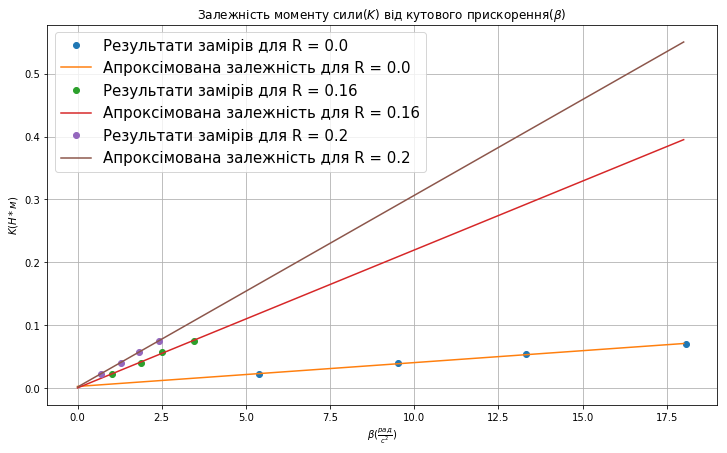

In [9]:
f = plt.figure(figsize = (12,7))
plt.title(r"Залежність моменту сили($K$) від кутового прискорення($\beta$)")
plt.ylabel("$K(H*м)$");
plt.xlabel(r'$\beta(\frac{рад}{c^2})$');
plt.rc('font', size=15)

for i in range(len(J)):    
    currentR = data['R'].unique()[i]
    indexes = data[data['R'] == currentR].index
    x = np.arange(0, np.max(beta),0.1)
    y = J[i] * x + KFriction[i]
    plt.plot(beta[indexes], K[indexes], 'o', label = "Результати замірів для R = " + str(currentR));
    plt.plot(x, y, '-', label = "Апроксімована залежність для R = " + str(currentR));
    
plt.grid();    
plt.legend(loc="best");

Обрахуємо значення моменту інерції одного вантажа відносно осі, яка проходить через його центр мас параллельно осі обертання, за допомогою моменту інерції системи без вантажів. Для цього побудуємо лінійну апроксімацію моменту інерції системи($J$) від квадрату відстані між вантажами та віссю обертання($R^2$). Вільний член якого буде дорівнювати: $J_0 + 4J_b$ , $J_0$ - момент інерції системи без вантажів, $J_b$ - момент інерції одного вантажа відносно осі, яка проходить через його центр мас параллельно осі обертання

In [10]:
R = data['R'].unique()
R = np.power(R,2)
basis = np.vstack((R,np.ones(len(R)))).T
koef = scipy.linalg.lstsq(basis, J)[0]
JB = (koef[1] - J[0]) / 4
print(JB)

6.178289320740347e-05


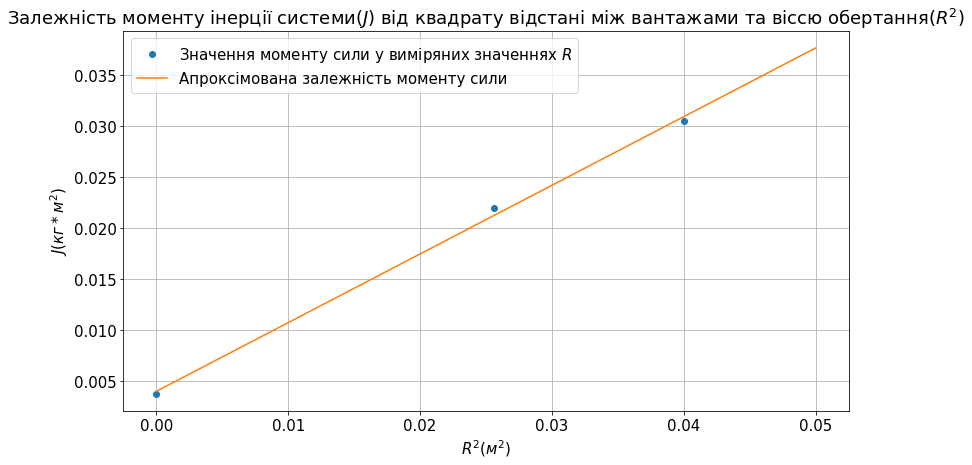

In [11]:
plt.figure(figsize = (13,7))
plt.title("Залежність моменту інерції системи($J$) від квадрату відстані між вантажами та віссю обертання($R^2$)")
plt.xlabel("$R^2(м^2)$")
plt.rc('font', size=15)
plt.ylabel("$J(кг*м^2)$")
plt.grid();

xnew = np.arange(0, np.max(R) + 0.01,0.001)
ynew = koef[0] * xnew + koef[1]

plt.plot(R, J, 'o', label = r"Значення моменту сили у виміряних значеннях $R$")
plt.plot(xnew, ynew, '-', label = "Апроксімована залежність моменту сили")
plt.legend(loc="best");

Отже, значення моменту інерції системи одного вантажа відносно осі, яка проходить через його центр мас параллельно осі обертання, дорівнює: $J_b \approx 6.2*10^{-5} \; кг*м^2$

Обрахуємо теоретичне значення власного моменту імпульсу вантажа($J_{b_{теоретичне}}$) формулою застосовною до тіла циліндричної форми: $J_{b_{теоретичне}} = \frac{m}{12}(3r^2 + h^2)$

In [13]:
JBTeoretical = 1/12 * 0.2  * (3 * 0.02**2 + 0.02**2)
print(JBTeoretical)
print(JBTeoretical - JB)
print(np.abs(JBTeoretical - JB)/JB)

2.6666666666666667e-05
-3.51162265407368e-05
0.5683810633932697


Отримаємо наступне теоретичне значення:  $\large J_{b_{теоретичне}} \approx 2.7 * 10{-5} \; кг*м^2$
Відносна похибка: $\frac{J_{b_{теоретичне}} - J_b}{J_b} * 100\% \approx 57\%$

## Висновок

Отже, ми дослідили закони обертального руху маятника Обербека в залежності від прикладеного моменту сил та моменту інерції маятника. У результаті були отримані величини моменту інерції усієї системи:
- для системи без вантажів: $J \approx 4 * 10^{-3} \; кг*м^2 $ 
- для системи з 4 вантажами масою у $0.2 \; кг$:
    - для відстані між вантажами та віссю обертання $R = 0.16 \; м \; J \approx 0.02 \; кг*м^2 $
    - для відстані між вантажами та віссю обертання $R = 0.2 \; м \; J \approx 0.03 \; кг*м^2 $
    
та моменту інерції одного вантажа $J_b = (6.2 \pm 3.5) * 10^{-5} \; кг*м^2$